# Proyecto 2
### Security Data Science
### Universidad del Valle de Guatemala

Andrés de la Roca - 20332

Modelos planteados:
- Random Forest
- SVM

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport


### Visualizacion de datos

In [2]:
data = pd.read_csv('fraud_feature_engineering_example.csv')

data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,count_month_shopping_net,first_time_at_merchant
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,4.97,4.97,0.0,0.0,True
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,107.23,107.23,0.0,0.0,True
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,220.11,220.11,0.0,0.0,True
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,45.00,45.00,0.0,0.0,True
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,41.96,41.96,0.0,0.0,True


In [3]:
# Name of the columns
print("Caracteristicas disponibles: ")
for i in data.columns:
    print(i)

Caracteristicas disponibles: 
trans_date_trans_time
cc_num
merchant
category
amt
first
last
gender
street
city
state
zip
lat
long
city_pop
job
dob
trans_num
unix_time
merch_lat
merch_long
is_fraud
amt_month
amt_year
amt_month_shopping_net_spend
count_month_shopping_net
first_time_at_merchant


In [4]:
# profile = ProfileReport(data, title='Proyecto 2 Profiling Report', explorative=True)
# profile.to_file("Proyecto_2_profiling.html")

0 = No fraudulento, 1 = Fraudulento


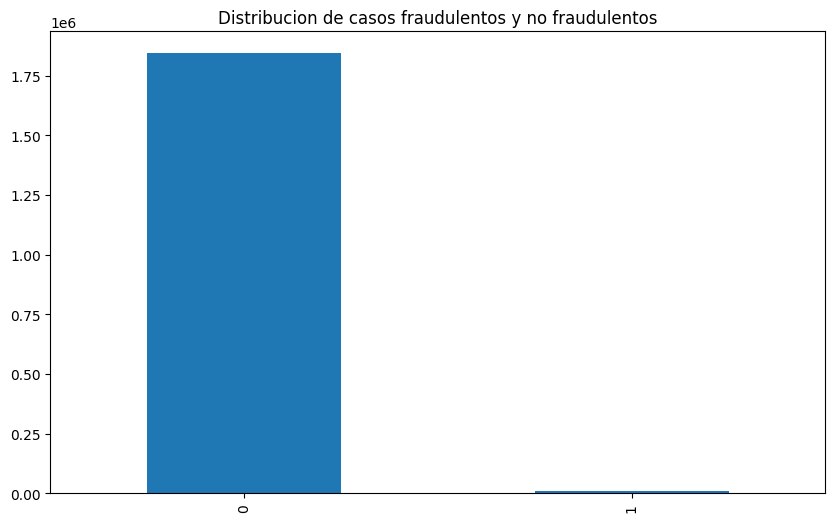

Cantidad de transacciones fraudulentas vs no fraudulentas
0    1842743
1       9651
Name: is_fraud, dtype: int64
Porcentaje de transacciones fraudulentas vs no fraudulentas
0    99.478999
1     0.521001
Name: is_fraud, dtype: float64


In [5]:
# Display is_fraud distribution 0 and 1
print("0 = No fraudulento, 1 = Fraudulento")
plt.figure(figsize=(10, 6))
data['is_fraud'].value_counts().plot(kind='bar')
plt.title('Distribucion de casos fraudulentos y no fraudulentos')
plt.show()

print("Cantidad de transacciones fraudulentas vs no fraudulentas")
print(data['is_fraud'].value_counts())
# Percentage of fraud transactions vs non-fraud transactions
print("Porcentaje de transacciones fraudulentas vs no fraudulentas")
print(data['is_fraud'].value_counts(normalize=True) * 100)



In [6]:
# Delete colums trans_date_trans_time
data = data.drop(columns=['state', 'zip', 'trans_num', 
                          'count_month_shopping_net', 'gender',
                          'first', 'last', 'job', 'dob', 'unix_time'])

In [7]:
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,street,city,lat,long,city_pop,merch_lat,merch_long,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,first_time_at_merchant
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,561 Perry Cove,Moravian Falls,36.0788,-81.1781,3495,36.011293,-82.048315,0,4.97,4.97,0.0,True
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,43039 Riley Greens Suite 393,Orient,48.8878,-118.2105,149,49.159047,-118.186462,0,107.23,107.23,0.0,True
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,594 White Dale Suite 530,Malad City,42.1808,-112.2620,4154,43.150704,-112.154481,0,220.11,220.11,0.0,True
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,9443 Cynthia Court Apt. 038,Boulder,46.2306,-112.1138,1939,47.034331,-112.561071,0,45.00,45.00,0.0,True
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,408 Bradley Rest,Doe Hill,38.4207,-79.4629,99,38.674999,-78.632459,0,41.96,41.96,0.0,True


In [8]:
data.shape

(1852394, 17)

<Figure size 1000x600 with 0 Axes>

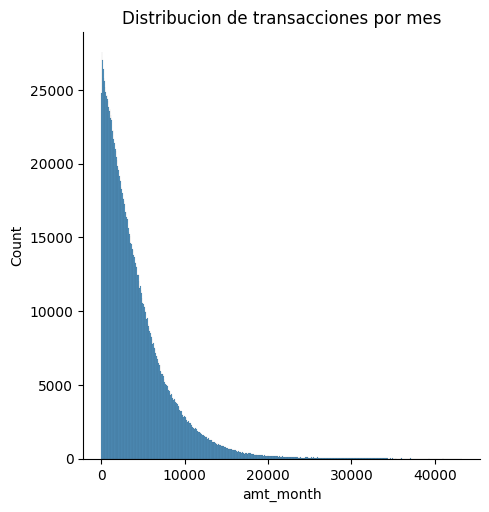

In [9]:
# Display the distribution of the transaction amount
plt.figure(figsize=(10, 6))
sns.displot(data['amt_month'])
plt.title('Distribucion de transacciones por mes')
plt.show()

<Figure size 1000x600 with 0 Axes>

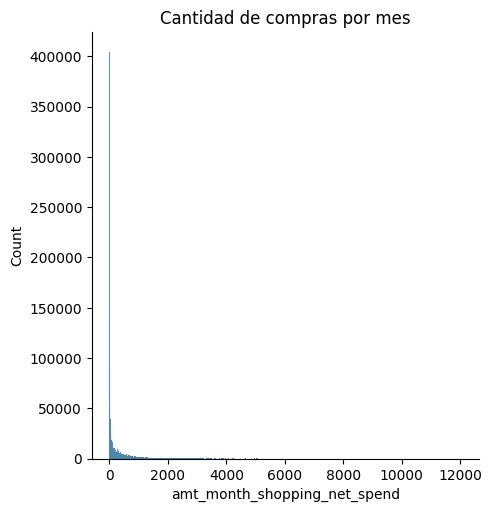

In [10]:
# Display the distribution of the transaction amount spent per month
plt.figure(figsize=(10, 6))
sns.displot(data['amt_month_shopping_net_spend'])
plt.title('Cantidad de compras por mes')
plt.show()

C:\Users\Andrès DLR\AppData\Local\Temp\ipykernel_21896\944840361.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


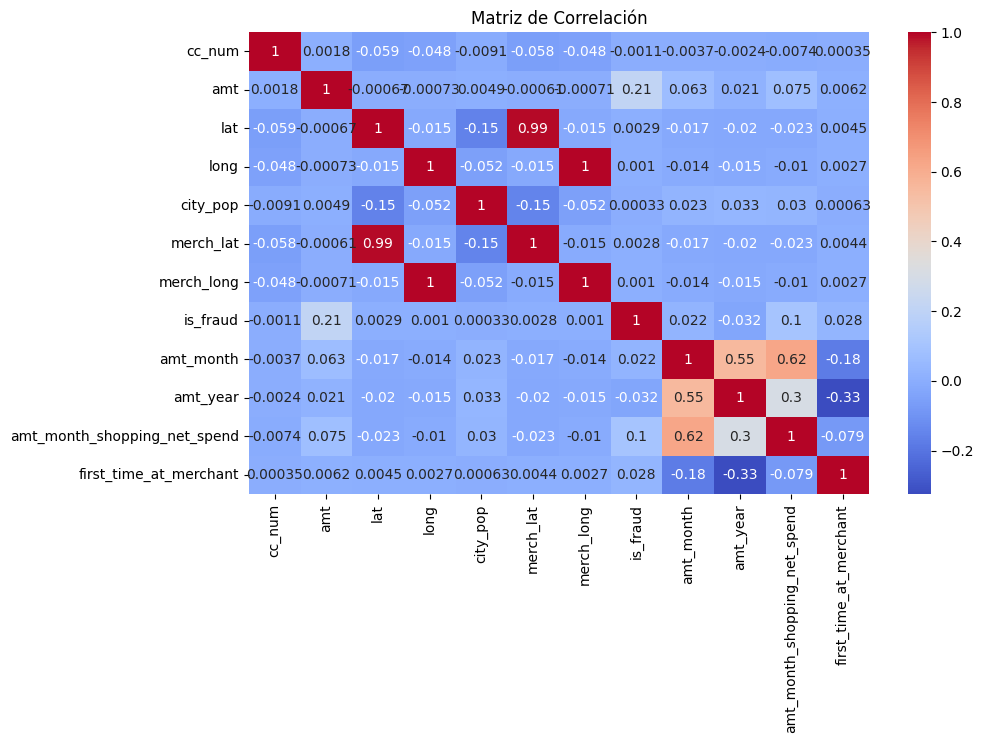

In [11]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

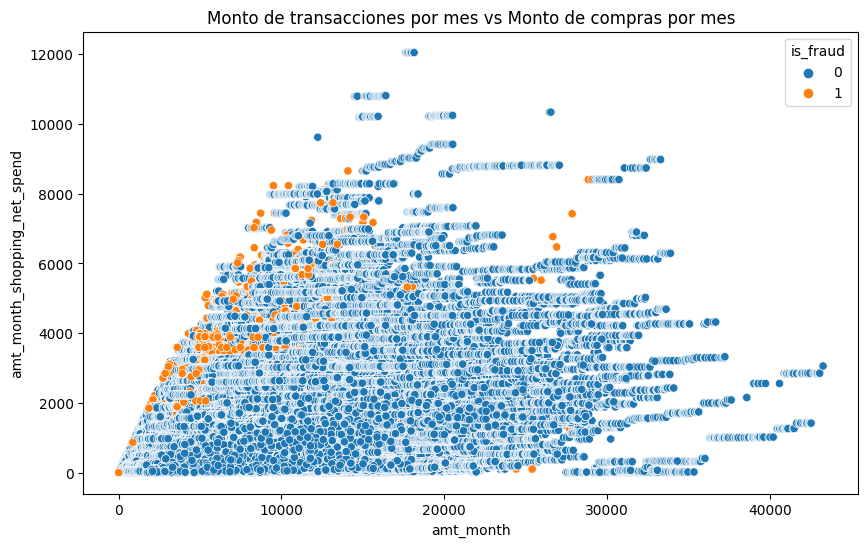

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amt_month', y='amt_month_shopping_net_spend', data=data, hue='is_fraud')
plt.title('Monto de transacciones por mes vs Monto de compras por mes')
plt.show()

In [13]:
# Merchant samples
print("Merchant samples")
print(data['merchant'].value_counts().head(10))

Merchant samples
fraud_Kilback LLC        6262
fraud_Cormier LLC        5246
fraud_Schumm PLC         5195
fraud_Kuhn LLC           5031
fraud_Boyer PLC          4999
fraud_Dickinson Ltd      4953
fraud_Emard Inc          3867
fraud_Cummerata-Jones    3860
fraud_Corwin-Collins     3853
fraud_Rodriguez Group    3843
Name: merchant, dtype: int64


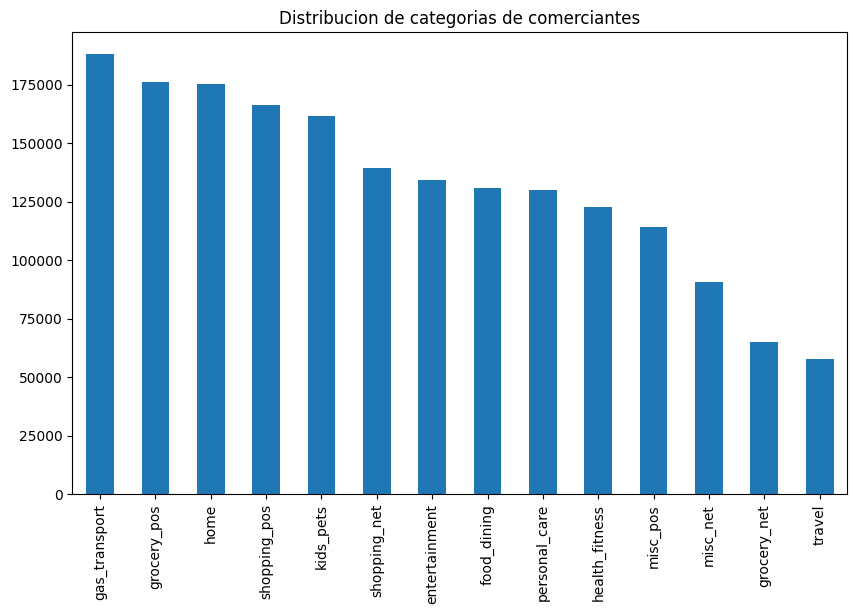

In [14]:
# Merchant category distribution
plt.figure(figsize=(10, 6))
data['category'].value_counts().plot(kind='bar')
plt.title('Distribucion de categorias de comerciantes')
plt.show()

In [15]:
# Tasa de fraude por categoria de comerciante
print("Tasa de fraude por categoria de comerciante")
print(data.groupby('category')['is_fraud'].mean().sort_values(ascending=False))

Tasa de fraude por categoria de comerciante
category
shopping_net      0.015927
misc_net          0.013039
grocery_pos       0.012645
shopping_pos      0.006344
gas_transport     0.004106
misc_pos          0.002819
grocery_net       0.002697
travel            0.002692
personal_care     0.002229
entertainment     0.002177
kids_pets         0.001880
food_dining       0.001568
home              0.001510
health_fitness    0.001510
Name: is_fraud, dtype: float64


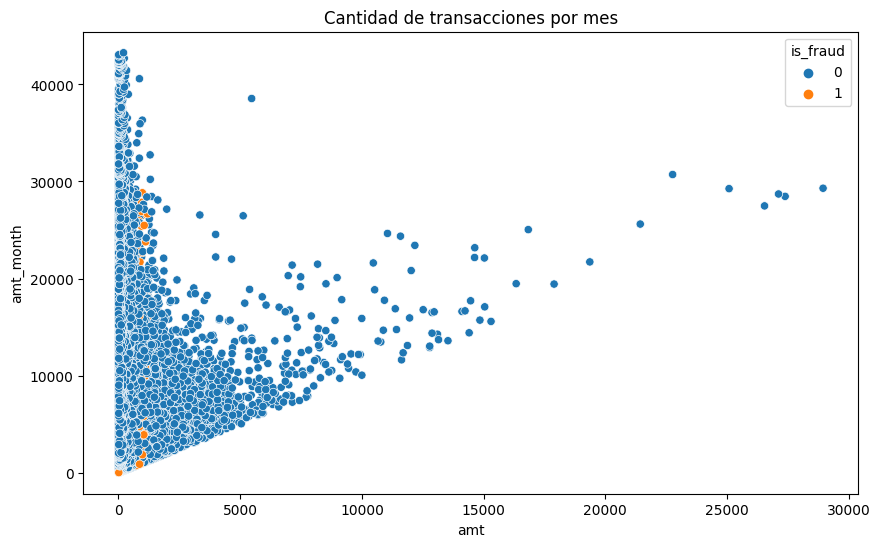

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='amt', y='amt_month', data=data, hue='is_fraud')
plt.title('Cantidad de transacciones por mes')
plt.show()

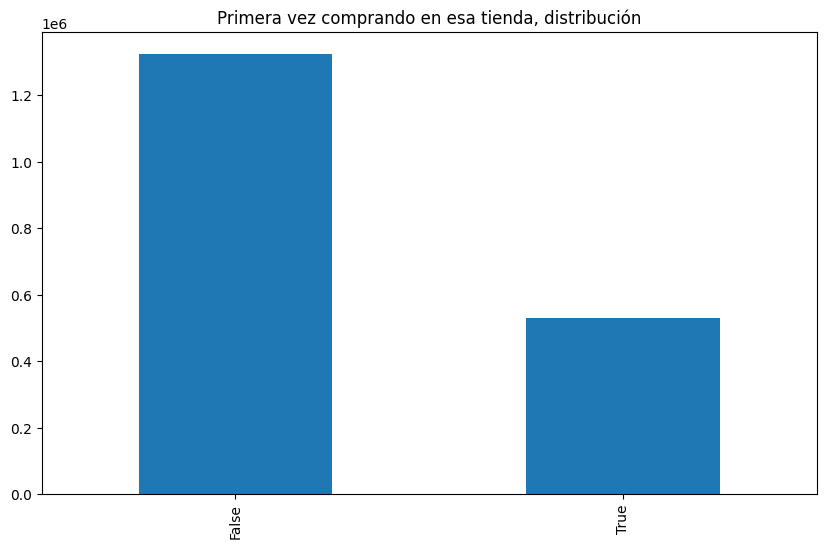

In [17]:
# First time at merchant
plt.figure(figsize=(10, 6))
data['first_time_at_merchant'].value_counts().plot(kind='bar')
plt.title('Primera vez comprando en esa tienda, distribución')
plt.show()

In [18]:
# Percentage of first time at merchant
print("Percentage of first time at merchant")
print(data['first_time_at_merchant'].value_counts(normalize=True) * 100)


Percentage of first time at merchant
False    71.424654
True     28.575346
Name: first_time_at_merchant, dtype: float64


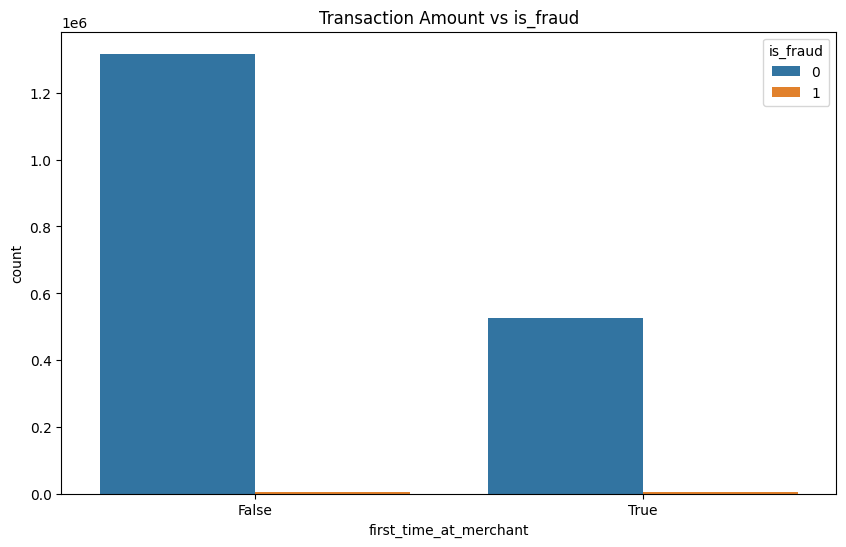

In [19]:
# Amt correlation with is_fraud
plt.figure(figsize=(10, 6))
sns.countplot(x='first_time_at_merchant', hue='is_fraud', data=data)
plt.title('Transaction Amount vs is_fraud')
plt.show()

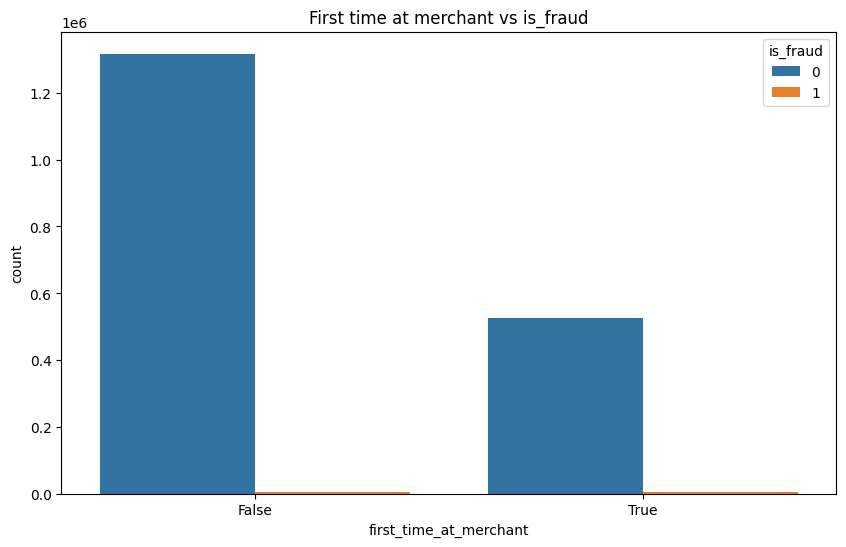

In [20]:
# First time at merchant correlation with is_fraud
plt.figure(figsize=(10, 6))
sns.countplot(x='first_time_at_merchant', hue='is_fraud', data=data)
plt.title('First time at merchant vs is_fraud')
plt.show()

### Feature Engineering

In [ ]:
# Distancia entre la ubicacion del cliente y la tienda
from geopy.distance import geodesic

def calcular_distancia(lat_cliente, long_cliente, lat_comerciante, long_comerciante):
    coords_cliente = (lat_cliente, long_cliente)
    coords_comerciante = (lat_comerciante, long_comerciante)
    distancia = geodesic(coords_cliente, coords_comerciante).kilometers
    return distancia

data['dist_between_client_and_merch'] = data.apply(lambda x: calcular_distancia(x['lat'], x['long'], x['merch_lat'], x['merch_long']), axis=1)


In [ ]:
data.head(10)

,trans_date_trans_time,cc_num,merchant,category,amt,street,city,lat,long,city_pop,merch_lat,merch_long,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,first_time_at_merchant,dist_between_client_and_merch
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,561 Perry Cove,Moravian Falls,36.0788,-81.1781,3495,36.011293,-82.048315,0,4.97,4.97,0.0,True,78.773821
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,43039 Riley Greens Suite 393,Orient,48.8878,-118.2105,149,49.159047,-118.186462,0,107.23,107.23,0.0,True,30.216618
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,594 White Dale Suite 530,Malad City,42.1808,-112.2620,4154,43.150704,-112.154481,0,220.11,220.11,0.0,True,108.102912
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,9443 Cynthia Court Apt. 038,Boulder,46.2306,-112.1138,1939,47.034331,-112.561071,0,45.00,45.00,0.0,True,95.685115
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,408 Bradley Rest,Doe Hill,38.4207,-79.4629,99,38.674999,-78.632459,0,41.96,41.96,0.0,True,77.702395
5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,4655 David Island,Dublin,40.3750,-75.2045,2158,40.653382,-76.152667,0,94.63,94.63,0.0,True,86.097358
6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,889 Sarah Station Suite 624,Holcomb,37.9931,-100.9893,2691,37.162705,-100.153370,0,44.54,44.54,0.0,True,118.094855
7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,231 Flores Pass Suite 720,Edinburg,38.8432,-78.6003,6018,38.948089,-78.540296,0,71.65,71.65,0.0,True,12.754714
8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,6888 Hicks Stream Suite 954,Manor,40.3359,-79.6607,1472,40.351813,-79.958146,0,4.27,4.27,0.0,True,25.333883
9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,21326 Taylor Squares Suite 708,Clarksville,36.5220,-87.3490,151785,37.179198,-87.485381,0,198.39,198.39,0.0,True,73.939714


In [ ]:
# Convertir trans_date en formato datetime
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

# Caracteristicas de tiempo
data['trans_month'] = data['trans_date_trans_time'].dt.month
data['trans_day'] = data['trans_date_trans_time'].dt.dayofweek
data['hour'] = data['trans_date_trans_time'].dt.hour
data['year'] = data['trans_date_trans_time'].dt.year

data.drop(columns=['trans_date_trans_time'], inplace=True)

data.head(10)

,cc_num,merchant,category,amt,street,city,lat,long,city_pop,merch_lat,...,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,561 Perry Cove,Moravian Falls,36.0788,-81.1781,3495,36.011293,...,0,4.97,4.97,0.0,True,78.773821,1,1,0,2019
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,43039 Riley Greens Suite 393,Orient,48.8878,-118.2105,149,49.159047,...,0,107.23,107.23,0.0,True,30.216618,1,1,0,2019
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,594 White Dale Suite 530,Malad City,42.1808,-112.2620,4154,43.150704,...,0,220.11,220.11,0.0,True,108.102912,1,1,0,2019
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,9443 Cynthia Court Apt. 038,Boulder,46.2306,-112.1138,1939,47.034331,...,0,45.00,45.00,0.0,True,95.685115,1,1,0,2019
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,408 Bradley Rest,Doe Hill,38.4207,-79.4629,99,38.674999,...,0,41.96,41.96,0.0,True,77.702395,1,1,0,2019
5,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,4655 David Island,Dublin,40.3750,-75.2045,2158,40.653382,...,0,94.63,94.63,0.0,True,86.097358,1,1,0,2019
6,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,889 Sarah Station Suite 624,Holcomb,37.9931,-100.9893,2691,37.162705,...,0,44.54,44.54,0.0,True,118.094855,1,1,0,2019
7,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,231 Flores Pass Suite 720,Edinburg,38.8432,-78.6003,6018,38.948089,...,0,71.65,71.65,0.0,True,12.754714,1,1,0,2019
8,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,6888 Hicks Stream Suite 954,Manor,40.3359,-79.6607,1472,40.351813,...,0,4.27,4.27,0.0,True,25.333883,1,1,0,2019
9,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,21326 Taylor Squares Suite 708,Clarksville,36.5220,-87.3490,151785,37.179198,...,0,198.39,198.39,0.0,True,73.939714,1,1,0,2019


In [ ]:
# Veces total que un cliente ha comprado en una tienda
data['times_shopped_at_merchant'] = data.groupby(['cc_num', 'merchant'])['merchant'].transform('size')

# Veces que un cliente ha comprado en una tienda por año
data['times_shopped_at_merchant_year'] = data.groupby(['cc_num', 'merchant', 'year'])['merchant'].transform('size')

# Veces que un cliente ha comprado en una tienda por mes
data['times_shopped_at_merchant_month'] = data.groupby(['cc_num', 'merchant', 'trans_month'])['merchant'].transform('size')

# Veces que un cliente ha comprado en una tienda por dia
data['times_shopped_at_merchant_day'] = data.groupby(['cc_num', 'merchant', 'trans_day'])['merchant'].transform('size')

data.head(10)




,cc_num,merchant,category,amt,street,city,lat,long,city_pop,merch_lat,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,561 Perry Cove,Moravian Falls,36.0788,-81.1781,3495,36.011293,...,True,78.773821,1,1,0,2019,5,4,2,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,43039 Riley Greens Suite 393,Orient,48.8878,-118.2105,149,49.159047,...,True,30.216618,1,1,0,2019,4,4,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,594 White Dale Suite 530,Malad City,42.1808,-112.2620,4154,43.150704,...,True,108.102912,1,1,0,2019,4,3,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,9443 Cynthia Court Apt. 038,Boulder,46.2306,-112.1138,1939,47.034331,...,True,95.685115,1,1,0,2019,1,1,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,408 Bradley Rest,Doe Hill,38.4207,-79.4629,99,38.674999,...,True,77.702395,1,1,0,2019,6,1,1,1
5,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,4655 David Island,Dublin,40.3750,-75.2045,2158,40.653382,...,True,86.097358,1,1,0,2019,2,2,1,1
6,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,889 Sarah Station Suite 624,Holcomb,37.9931,-100.9893,2691,37.162705,...,True,118.094855,1,1,0,2019,4,4,1,1
7,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,231 Flores Pass Suite 720,Edinburg,38.8432,-78.6003,6018,38.948089,...,True,12.754714,1,1,0,2019,3,2,1,1
8,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,6888 Hicks Stream Suite 954,Manor,40.3359,-79.6607,1472,40.351813,...,True,25.333883,1,1,0,2019,2,1,1,1
9,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,21326 Taylor Squares Suite 708,Clarksville,36.5220,-87.3490,151785,37.179198,...,True,73.939714,1,1,0,2019,5,4,1,2


In [ ]:
# Get columns
data = data.drop(columns=['street', 'city'])

data.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'lat', 'long', 'city_pop',
       'merch_lat', 'merch_long', 'is_fraud', 'amt_month', 'amt_year',
       'amt_month_shopping_net_spend', 'first_time_at_merchant',
       'dist_between_client_and_merch', 'trans_month', 'trans_day', 'hour',
       'year', 'times_shopped_at_merchant', 'times_shopped_at_merchant_year',
       'times_shopped_at_merchant_month', 'times_shopped_at_merchant_day'],
      dtype='object')

In [ ]:
# Guardar el dataset
data.to_csv('dataset_limpio.csv', index=False)

### Preprocesamiento

In [23]:
data_final = pd.read_csv('dataset_limpio.csv')

data_final.head(10)

,cc_num,merchant,category,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,36.0788,-81.1781,3495,36.011293,-82.048315,0,...,True,78.773821,1,1,0,2019,5,4,2,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,48.8878,-118.2105,149,49.159047,-118.186462,0,...,True,30.216618,1,1,0,2019,4,4,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,42.1808,-112.2620,4154,43.150704,-112.154481,0,...,True,108.102912,1,1,0,2019,4,3,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,46.2306,-112.1138,1939,47.034331,-112.561071,0,...,True,95.685115,1,1,0,2019,1,1,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,38.4207,-79.4629,99,38.674999,-78.632459,0,...,True,77.702395,1,1,0,2019,6,1,1,1
5,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,40.3750,-75.2045,2158,40.653382,-76.152667,0,...,True,86.097358,1,1,0,2019,2,2,1,1
6,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,37.9931,-100.9893,2691,37.162705,-100.153370,0,...,True,118.094855,1,1,0,2019,4,4,1,1
7,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,38.8432,-78.6003,6018,38.948089,-78.540296,0,...,True,12.754714,1,1,0,2019,3,2,1,1
8,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,40.3359,-79.6607,1472,40.351813,-79.958146,0,...,True,25.333883,1,1,0,2019,2,1,1,1
9,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,36.5220,-87.3490,151785,37.179198,-87.485381,0,...,True,73.939714,1,1,0,2019,5,4,1,2


In [24]:
# Separar el dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


data_copy = data_final[data_final.year == 2019]

# Generar dataset 2019
X_2019 = data_copy.drop(columns='is_fraud')
y_2019 = data_copy['is_fraud']


numeric_features = X_2019.select_dtypes(include=[np.number])
X_2019 = numeric_features.values

# Balancear el dataset
# oversampler = RandomOverSampler(sampling_strategy='minority')
oversampler = SMOTE()
X_2019, y_2019 = oversampler.fit_resample(X_2019, y_2019)

X_train_2019, X_test_2019, y_train_2019, y_test_2019 = train_test_split(X_2019, y_2019, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_2019 = scaler.fit_transform(X_train_2019)
X_test_2019 = scaler.transform(X_test_2019)

In [25]:
# Generar dataset 2020
data_copy = data_final[data_final.year == 2020]

X_2020 = data_copy.drop(columns='is_fraud')
y_2020 = data_copy['is_fraud']



numeric_features = X_2020.select_dtypes(include=[np.number])
X_2020 = numeric_features.values

# Balancear el dataset
oversampler = SMOTE()
X_2020, y_2020 = oversampler.fit_resample(X_2020, y_2020)

X_train_2020, X_test_2020, y_train_2020, y_test_2020 = train_test_split(X_2020, y_2020, test_size=0.3, random_state=42)

scaler = StandardScaler()

X_train_2020 = scaler.fit_transform(X_train_2020)
X_test_2020 = scaler.transform(X_test_2020)

### Desarrollo de modelos

#### Incremental Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, recall_score, f1_score

rf_start = RandomForestClassifier(n_estimators=10,
                                  max_depth=2,
                                  min_samples_split=5,
                                  random_state=42,
                                  warm_start=True)

rf_start.fit(X_train_2019, y_train_2019)
y_pred = rf_start.predict(X_test_2019)

# Metricas de rendimientos
print("Metricas de rendimiento - 2019")
print(classification_report(y_test_2019, y_pred))


roc_start = roc_auc_score(y_test_2019, y_pred)
recall_start = recall_score(y_test_2019, y_pred)
f1_start = f1_score(y_test_2019, y_pred)

print("ROC AUC Score: ", roc_start)
print("Recall Score: ", recall_start)
print("F1 Score: ", f1_start)


# Entrenamiento incremental  

rf_start.n_estimators += 10

rf_start.fit(X_train_2020, y_train_2020)
y_pred = rf_start.predict(X_test_2020)

roc_incremental = roc_auc_score(y_test_2020, y_pred)
recall_incremental = recall_score(y_test_2020, y_pred)
f1_incremental = f1_score(y_test_2020, y_pred)

print("\nMetricas de rendimiento post-entrenamiento incremental - 2020")
print("ROC AUC Score: ", roc_incremental)
print("Recall Score: ", recall_incremental)
print("F1 Score: ", f1_incremental)




Metricas de rendimiento - 2019
              precision    recall  f1-score   support

           0       0.86      0.93      0.89    275766
           1       0.93      0.84      0.88    276012

    accuracy                           0.89    551778
   macro avg       0.89      0.89      0.89    551778
weighted avg       0.89      0.89      0.89    551778

ROC AUC Score:  0.888774664841202
Recall Score:  0.8428111821225164
F1 Score:  0.8834429918254578

Metricas de rendimiento post-entrenamiento incremental - 2020
ROC AUC Score:  0.8961790842267596
Recall Score:  0.838865177546201
F1 Score:  0.8898681957643382


#### Incremental SVM

In [27]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

svm = SGDClassifier(loss='hinge', penalty='l2', max_iter=1000, random_state=42)
svm.fit(X_train_2019, y_train_2019)

y_pred = svm.predict(X_test_2019)

roc_svm = roc_auc_score(y_test_2019, y_pred)
recall_svm = recall_score(y_test_2019, y_pred)
f1_svm = f1_score(y_test_2019, y_pred)

print("\nMetricas de rendimiento para SVM - 2019")
print("ROC AUC Score: ", roc_svm)
print("Recall Score: ", recall_svm)
print("F1 Score: ", f1_svm)

# Entrenamiento incremental
svm.partial_fit(X_train_2020, y_train_2020)

y_pred = svm.predict(X_test_2020)

roc_svm_incremental = roc_auc_score(y_test_2020, y_pred)
recall_svm_incremental = recall_score(y_test_2020, y_pred)
f1_svm_incremental = f1_score(y_test_2020, y_pred)

print("\nMetricas de rendimiento post-entrenamiento incremental para SVM - 2020")
print("ROC AUC Score: ", roc_svm_incremental)
print("Recall Score: ", recall_svm_incremental)
print("F1 Score: ", f1_svm_incremental)




Metricas de rendimiento para SVM - 2019
ROC AUC Score:  0.8905166672154541
Recall Score:  0.8315508021390374
F1 Score:  0.8836775041822196

Metricas de rendimiento post-entrenamiento incremental para SVM - 2020
ROC AUC Score:  0.8938554561830893
Recall Score:  0.8354926302258234
F1 Score:  0.8872779005937989
